In [33]:
import os
import os.path
import re
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Step 1. Read data

In [42]:
basepath = Path("../../01_Scraping/data")

In [43]:
Celebrity = pd.read_csv(basepath / Path("imdb_top_100_celebs.csv"), sep = ';')

Top_movie_brief = pd.read_csv(basepath / Path("imdb_top_250.csv"), sep = ';')

Top_movie_detailed = pd.read_csv(basepath / Path('Top250_detailed_info.csv'))

Top_movie = Top_movie_brief.merge(Top_movie_detailed,on=['Rank'])

Step 2. Merge

In [44]:
Movie_n_Celebrity = pd.DataFrame(None,columns=['English_Title','Cele_name','Movie_rank','Cele_rank'])
for index,row in  Top_movie.iterrows():
    for Movie_guy in row['Stars'].replace(', ',',').split(','):
        if Movie_guy in Celebrity['Name'].unique():
            Cele_rank = Celebrity[Celebrity['Name']==Movie_guy].reset_index()['Rank'][0]
            temp_dic ={
                'English_Title':row['English_Title'],
                'Cele_name':Movie_guy,
                'Movie_rank':row['Rank'],
                'Cele_rank':Cele_rank
            }
            movie_Cele = pd.DataFrame.from_dict(temp_dic, orient='index').T
            Movie_n_Celebrity = pd.concat([Movie_n_Celebrity,movie_Cele],axis = 0,ignore_index=True)

In [61]:
Movie_n_Celebrity.to_csv('Movie_n_Celebrity.csv')

Step 3. Group

In [49]:
#how many celebrities each movie has
Movie_num = Movie_n_Celebrity.groupby(['English_Title'])['Cele_name'].count().reset_index()
Movie_num = Movie_num.merge(Top_movie[['Rank','English_Title','Release Year','Rating']],how='right',on=['English_Title'])
Movie_num['Cele_name'].fillna(0,inplace = True)
Movie_num.rename(columns={'Cele_name':'Cele_amount'},inplace = True)
Movie_num

,English_Title,Cele_amount,Rank,Release Year,Rating
0,The Shawshank Redemption,0.0,1,1994,9.3
1,The Godfather,0.0,2,1972,9.2
2,The Dark Knight,1.0,3,2008,9.0
3,The Godfather Part II,0.0,4,1974,9.0
4,12 Angry Men,0.0,5,1957,9.0
...,...,...,...,...,...
245,The Help,2.0,246,2011,8.1
246,It Happened One Night,0.0,247,1934,8.1
247,Aladdin,0.0,248,1992,8.0
248,Dances with Wolves,0.0,249,1990,8.0


In [51]:
#how many top movies each celebrity has
cele_num = Movie_n_Celebrity.groupby(['Cele_name'])['English_Title'].count().reset_index()
cele_num = cele_num.merge(Celebrity.rename(columns={'Name':'Cele_name'})[['Rank','Cele_name','Role(s)']],how='right',on=['Cele_name'])
cele_num['English_Title'].fillna(0,inplace = True)
cele_num.rename(columns={'English_Title':'Movie_amt'},inplace = True)
cele_num

,Cele_name,Movie_amt,Rank,Role(s)
0,Aaron Taylor-Johnson,0.0,1,"Actor, Producer, Writer"
1,Kaya Scodelario,0.0,2,Actress
2,Sydney Sweeney,0.0,3,"Actress, Producer"
3,Theo James,0.0,4,"Actor, Producer, Executive"
4,Anna Sawai,0.0,5,Actress
...,...,...,...,...
95,Vanessa Kirby,0.0,96,"Actress, Producer, Soundtrack"
96,Tom Cruise,1.0,97,"Actor, Producer, Director"
97,Glen Powell,1.0,98,"Actor, Producer, Writer"
98,Monica Bellucci,0.0,99,"Actress, Producer, Soundtrack"


Step 4.Visualization

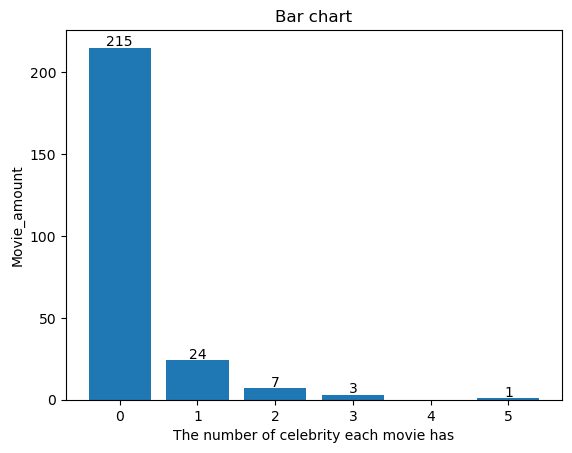

In [57]:
#The Movie
Movie_visual = Movie_num.groupby(['Cele_amount'])['English_Title'].count().reset_index()
plt.bar(Movie_visual['Cele_amount'], Movie_visual['English_Title'])

plt.title('Bar chart')
plt.xlabel('The number of celebrity each movie has')
plt.ylabel('Movie_amount')


for i in range(len(Movie_visual)):
    plt.text(Movie_visual['Cele_amount'][i], Movie_visual['English_Title'][i] + 1, str(Movie_visual['English_Title'][i]), ha='center')


plt.show()

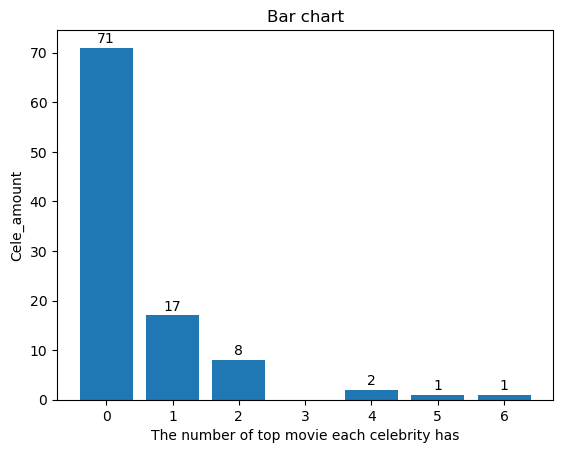

In [60]:
#The Celebrity
Cele_visual = cele_num.groupby(['Movie_amt'])['Cele_name'].count().reset_index()
plt.bar(Cele_visual['Movie_amt'], Cele_visual['Cele_name'])

plt.title('Bar chart')
plt.xlabel('The number of top movie each celebrity has')
plt.ylabel('Cele_amount')


for i in range(len(Cele_visual)):
    plt.text(Cele_visual['Movie_amt'][i], Cele_visual['Cele_name'][i] + 1, str(Cele_visual['Cele_name'][i]), ha='center')


plt.show()